# Multiclass classification

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from sklearn.datasets import make_blobs
from keras import Sequential, Input, layers
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

## (1) Create a Blobs dataset

In [3]:
X, y = make_blobs(n_samples=1200, centers=7, n_features=8, cluster_std=8, random_state=1)
X.shape, y.shape

((1200, 8), (1200,))

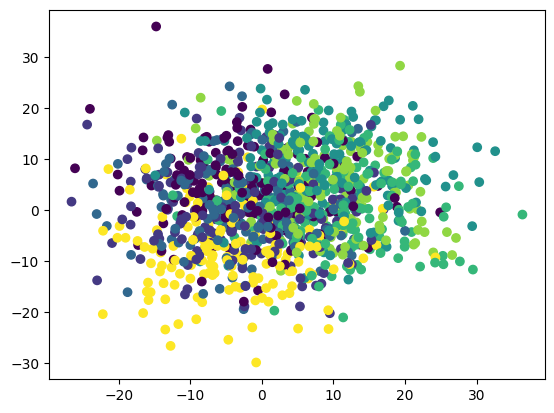

In [5]:
%matplotlib inline

# Showing the dimension 0 vs the dimension 1
plt.scatter(X.T[0], X.T[1], c=y)
plt.show()

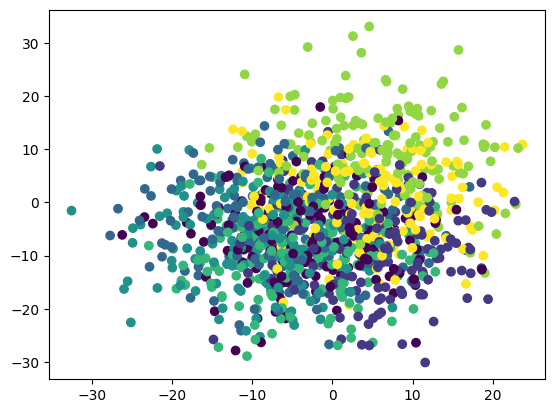

In [6]:
plt.scatter(X.T[3], X.T[6], c=y)
plt.show()

## (2) Encoding the target of a multi-class classification problem

In [8]:
print("-"*50)
print("The original target looks like:")
print(y)

print("Its shape is:")
print(y.shape)

print("-"*50)

print("The encoded target looks like:")
y_cat = to_categorical(y)
print(y_cat)

print("Its shape is:")
print(y_cat.shape)

--------------------------------------------------
The original target looks like:
[2 2 5 ... 1 3 0]
Its shape is:
(1200,)
--------------------------------------------------
The encoded target looks like:
[[0. 0. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]
Its shape is:
(1200, 7)


## (3) NN for a multi-class classification task

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y_cat, test_size=0.3)

In [11]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((840, 8), (360, 8), (840, 7), (360, 7))

In [13]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [16]:
model = Sequential()
model.add(Input(shape=(8, )))
model.add(layers.Dense(50, activation='relu'))
model.add(layers.Dense(7, activation='softmax'))

model.compile(loss='categorical_crossentropy', # different from binary_crossentropy because we have multiple classes
              optimizer='adam',
              metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 50)             │           450 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │           357 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 807 (3.15 KB)

 Trainable params: 807 (3.15 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
history = model.fit(X_train, y_train, epochs=50, batch_size=16, verbose=0)
history.__dict__

{'params': {'verbose': 0, 'epochs': 50, 'steps': 53},
 '_model': <Sequential name=sequential, built=True>,
 'history': {'accuracy': [0.3559523820877075,
   0.5047619342803955,
   0.5892857313156128,
   0.6428571343421936,
   0.6785714030265808,
   0.699999988079071,
   0.7130952477455139,
   0.7130952477455139,
   0.7226190567016602,
   0.7190476059913635,
   0.7166666388511658,
   0.7214285731315613,
   0.7285714149475098,
   0.7297618985176086,
   0.7309523820877075,
   0.7333333492279053,
   0.7369047403335571,
   0.7345238327980042,
   0.7297618985176086,
   0.7416666746139526,
   0.7369047403335571,
   0.7369047403335571,
   0.7404761910438538,
   0.7369047403335571,
   0.7416666746139526,
   0.7440476417541504,
   0.7428571581840515,
   0.7440476417541504,
   0.7440476417541504,
   0.7452380657196045,
   0.7464285492897034,
   0.7476190328598022,
   0.7476190328598022,
   0.7488095164299011,
   0.75,
   0.7523809671401978,
   0.7464285492897034,
   0.7535714507102966,
   0.755952

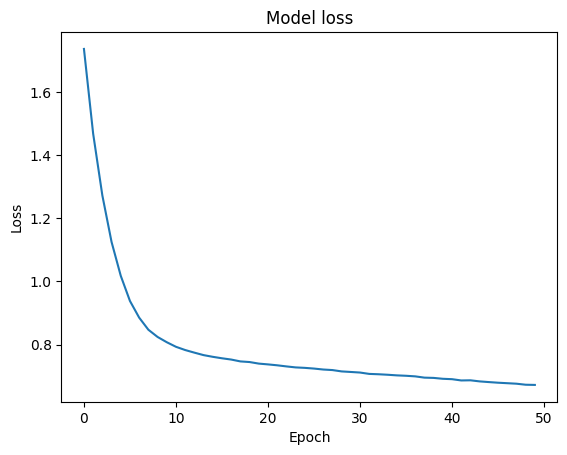

In [18]:
def plot_history(history):
    plt.plot(history.history['loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.show()

plot_history(history)

In [19]:
results = model.evaluate(X_test, y_test, verbose=0)
print(results[1])

0.6555555462837219


In [21]:
accuracy_baseline = 1/7

In [22]:
history = model.fit(X_train, y_train, epochs=1000, batch_size=16, verbose=0)
history.__dict__

{'params': {'verbose': 0, 'epochs': 1000, 'steps': 53},
 '_model': <Sequential name=sequential, built=True>,
 'history': {'accuracy': [0.7583333253860474,
   0.7654761672019958,
   0.7630952596664429,
   0.7642857432365417,
   0.7559523582458496,
   0.7630952596664429,
   0.7595238089561462,
   0.7583333253860474,
   0.7654761672019958,
   0.7607142925262451,
   0.7690476179122925,
   0.7654761672019958,
   0.7654761672019958,
   0.7666666507720947,
   0.7630952596664429,
   0.7690476179122925,
   0.7702381014823914,
   0.7702381014823914,
   0.7690476179122925,
   0.773809552192688,
   0.7749999761581421,
   0.7702381014823914,
   0.7726190686225891,
   0.7773809432983398,
   0.773809552192688,
   0.7749999761581421,
   0.7785714268684387,
   0.776190459728241,
   0.773809552192688,
   0.7749999761581421,
   0.7773809432983398,
   0.7785714268684387,
   0.7749999761581421,
   0.7785714268684387,
   0.7833333611488342,
   0.7797619104385376,
   0.7797619104385376,
   0.7785714268684387

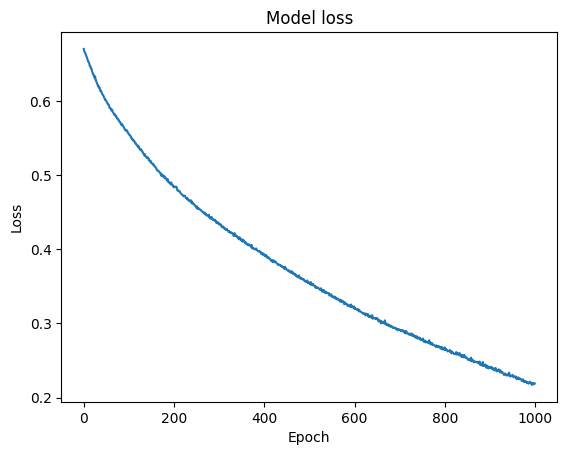

In [23]:
def plot_history(history):
    plt.plot(history.history['loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.show()

plot_history(history)

In [24]:
results = model.evaluate(X_test, y_test, verbose=0)
print(results[1])

0.6194444298744202


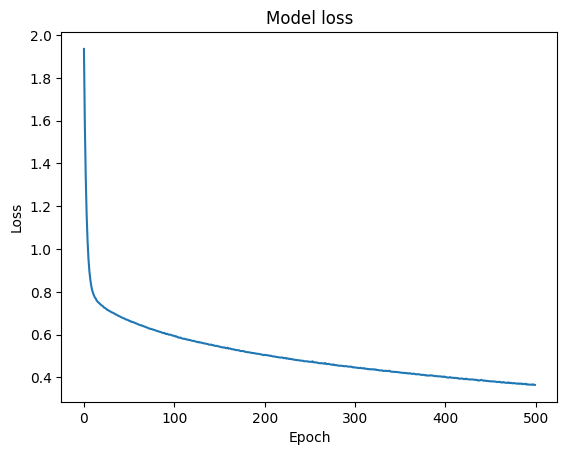

In [25]:
model = Sequential()
model.add(Input(shape=(8, )))
model.add(layers.Dense(50, activation='relu'))
model.add(layers.Dense(7, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(X_train,
                    y_train,
                    validation_data=(X_test, y_test),
                    epochs=500,
                    batch_size=16,
                    verbose=0)
plot_history(history)

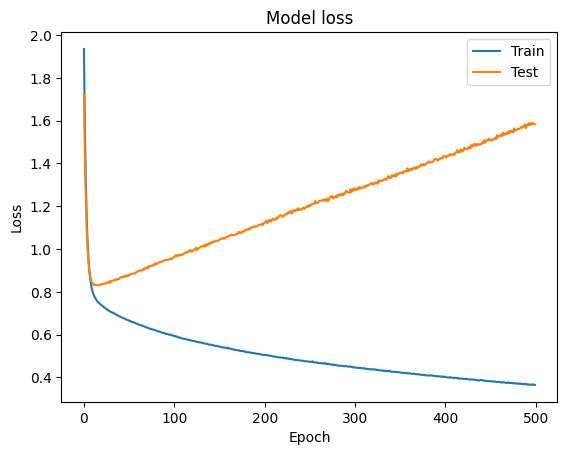

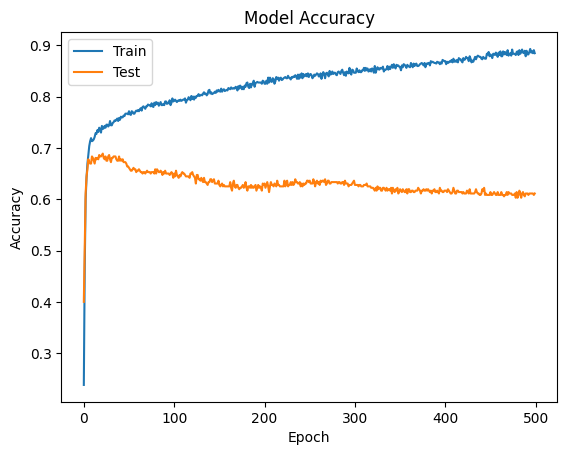

In [26]:
def plot_loss_accuracy(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='best')
    plt.show()

    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='best')
    plt.show()

plot_loss_accuracy(history)